<a href="https://colab.research.google.com/github/schneesternsilvpascal7/schneesternsilvpascal7/blob/main/Copy_of_NurseScheduling_v2_GL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#install pulp library
%pip install pulp

#import PuLP modeler function
from pulp import *

#import matplotlib for data visualisation
import matplotlib.pyplot as plt

Objective: Understand how to program a mixed integer linear programming case study in Python using PuLP

You are the ED manager that wish to create a resource scheduling algorithm for assigning the nurses to patient. Your objective is to minimize total waiting time of the patients.
This is a step-by-step exercise. You will start to make the program from simplest case (sequencing tasks in 1 nurse).

##### Q1: we start by assuming that we only want to sequence or order the 6 patients that are assigned to a nurse. Currently, we assume that all patients arrive at the same time (at time zero) and they are in the same triage level. We were given the treatment time of these 6 patients as follows:
Patient 1: 34, Patient 2: 18, Patient 3: 34, Patient 4: 31, Patient 5: 7, Patient 6: 11

a. Create two lists: 1. list that contains 0 as the first element, *then* all treatment time of the 6 patients. 2. list that containts index of patients from 0 to 6

In [33]:
patientIndex = [0, 1, 2, 3, 4, 5, 6]
treatmentTime = [0, 34, 18, 34, 31, 7, 11]

b. create dictionaries from the 2 lists above, with index of patients as key and treatment time as value

In [34]:
treatmentPatient = dict(zip(patientIndex, treatmentTime))

c. create variable to store problem data of our MILP

In [35]:
prob = LpProblem("NurseSchedv1", LpMinimize)

d. create our decision variables. There are 3 decision variables: <br>
(let j = index of patients) <br>
sⱼ = start time of patient j <br>
cⱼ = completion time of patient j <br>
zⱼₖ = binary variable (1 if patient k is treated directly after patient j)

In [36]:
s = LpVariable.dicts("s", patientIndex, 0, None, LpInteger) #s_0, s_1, s_2, ...
c = LpVariable.dicts("c", patientIndex, 0, None, LpInteger)
z = LpVariable.dicts("z", (patientIndex, patientIndex), 0, None, LpBinary)

e. Create objective function. Min a = sum of sⱼ

In [37]:
prob += lpSum(s[j] for j in patientIndex)

Here are the constraints

In [38]:
#constraints
#Constraint 1: to make sure that for every patients, the completion time is defined as the total of start time and treatment time
for j in range(1, len(patientIndex)):
    prob += s[j] + treatmentPatient[j] == c[j]

#Constraint 2: to make sure that if patient k is treated directly after patient j, the completion time patient j should be equal to or smaller than start time of patient k
for j in range(1, len(patientIndex)):
    for k in range(1, len(patientIndex)):
        if j != k:
            prob += c[j] - s[k] <= 1000 * (1 - z[j][k])

#Constraint 3: to make sure that each patient has his predecessor (including the first one that has dummy patient with index 0 as predecessor)
for k in range(1, len(patientIndex)):
    prob += lpSum(z[j][k] for j in patientIndex if j != k) == 1

#Constraint 4: to make sure that each patient has his successor (except the last one)
for j in range(len(patientIndex)):
    prob += lpSum(z[j][k] for k in range(1, len(patientIndex)) if j != k) <= 1

f. Write the program to .lp file and solve the problem. Display also the result

In [39]:
prob.solve()
print("status:", LpStatus[prob.status])

print("Total waiting time = ", value(prob.objective))

status: Optimal
Total waiting time =  229.0


g. We want to know when the patient 5 is treated. How to access only the start time of patient 5?

In [40]:
treatmentTime[5]

7

h. (extra knowledge) plot the schedule of the nurse

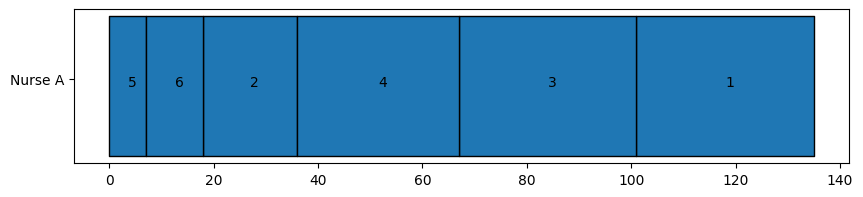

In [41]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_yticks([10])
ax.set_yticklabels(['Nurse A'])

for j in range(1, len(patientIndex)):
    ax.broken_barh([(s[j].varValue, treatmentTime[j])], (5, 9), edgecolor='black')
    ax.text(x=(s[j].varValue+ 0.5*treatmentTime[j]), y=9.5, s=j)

###### Q2: Now, we assume that all patients arrive at different time. The arrival time of 6 patients: <br>
Patient 1: 0, Patient 2: 4, Patient 3: 6, Patient 4: 11, Patient 5: 17, Patient 6: 21

a. Create a list for all arrival time (put 0 at index 0) and create dictionaires named *arrivalPatient* for patient index and arrival time

In [42]:
arrivalTime = [0, 0, 4, 6, 11, 17, 21]
arrivalPatient = dict(zip(patientIndex, arrivalTime))

b. retype the problem data variable initialisation and the decision variable

In [43]:
prob = LpProblem("NurseSchedq2", LpMinimize)

s = LpVariable.dicts("s", patientIndex, 0, None, LpInteger) #s_0, s_1, s_2, ...
c = LpVariable.dicts("c", patientIndex, 0, None, LpInteger)
z = LpVariable.dicts("z", (patientIndex, patientIndex), 0, None, LpBinary)

c. modify the objective function: Min a = sum of (sⱼ - aⱼ)

In [44]:
prob += lpSum((s[j] - arrivalPatient[j]) for j in patientIndex)

d. Modify the constraint: add constraint that tells for each patient, the start time should be equal to or larger than the arrival time

In [45]:
#constraints
#Constraint 1: to make sure that for every patients, the completion time is defined as the total of start time and treatment time
for j in range(1, len(patientIndex)):
    prob += s[j] + treatmentPatient[j] == c[j]

#Constraint 2: to make sure that if patient k is treated directly after patient j, the completion time patient j should be equal to or smaller than start time of patient k
for j in range(1, len(patientIndex)):
    for k in range(1, len(patientIndex)):
        if j != k:
            prob += c[j] - s[k] <= 1000 * (1 - z[j][k])

#Constraint 3: to make sure that each patient has his predecessor (including the first one that has dummy patient with index 0 as predecessor)
for k in range(1, len(patientIndex)):
    prob += lpSum(z[j][k] for j in patientIndex if j != k) == 1

#Constraint 4: to make sure that each patient has his successor (except the last one)
for j in range(len(patientIndex)):
    prob += lpSum(z[j][k] for k in range(1, len(patientIndex)) if j != k) <= 1

#Constraint 5: to make sure that for every patients, the treatment start time is larger than or equal to arrival time
for j in range(1, len(patientIndex)):
    prob += s[j] >= arrivalPatient[j]


e. solve the MILP problem

In [46]:
prob.solve()
print("status:", LpStatus[prob.status])

print("Total waiting time = ", value(prob.objective))

status: Optimal
Total waiting time =  212.0


f. Visualisation: plot the schedule

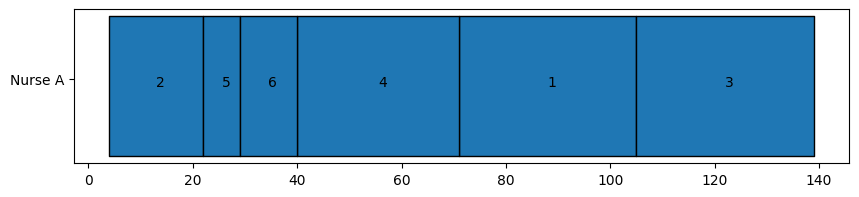

In [47]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_yticks([10])
ax.set_yticklabels(['Nurse A'])

for j in range(1, len(patientIndex)):
    ax.broken_barh([(s[j].varValue, treatmentTime[j])], (5, 9), edgecolor='black')
    ax.text(x=(s[j].varValue+ 0.5*treatmentTime[j]), y=9.5, s=j)

###### Q3: Now, we assume that all patients have different triage level. The arrival time of 6 patients: <br>
Patient 1: 1, Patient 2: 4, Patient 3: 2, Patient 4: 1, Patient 5: 5, Patient 6: 5 <br>
Each triage level has its own weight: <br>
Triage level 1: 10^8, Triage level 2: 10^6, Triage level 3: 10^4, Triage level 4: 100, Triage level 5: 1 <br>
a. Create list of triage level <br>

In [48]:
TriageLevel = [0, 1, 4, 2, 1, 5, 5]


b. Create list of weight that correspond to triage level <br>

In [49]:
TheList = [0, 10**8, 100, 10**6, 10**8, 1, 1]

c. Create a dictionary named *weightPatient* which key is the index of patient and value is the weight <br>

In [50]:
weightPatient = dict(zip(patientIndex, TheList))

d. Modify the objective function: Min a = sum of wⱼ(sⱼ - aⱼ), with wⱼ is the weight <br>

In [51]:
prob = LpProblem("NurseSchedq2", LpMinimize)

s = LpVariable.dicts("s", patientIndex, 0, None, LpInteger) #s_0, s_1, s_2, ...
c = LpVariable.dicts("c", patientIndex, 0, None, LpInteger)
z = LpVariable.dicts("z", (patientIndex, patientIndex), 0, None, LpBinary)

prob += lpSum((weightPatient[j]*(s[j] - arrivalPatient[j])) for j in patientIndex)

e. Copy the constraints and solve the problem

In [52]:
#constraints
#Constraint 1: to make sure that for every patients, the completion time is defined as the total of start time and treatment time
for j in range(1, len(patientIndex)):
    prob += s[j] + treatmentPatient[j] == c[j]

#Constraint 2: to make sure that if patient k is treated directly after patient j, the completion time patient j should be equal to or smaller than start time of patient k
for j in range(1, len(patientIndex)):
    for k in range(1, len(patientIndex)):
        if j != k:
            prob += c[j] - s[k] <= 1000 * (1 - z[j][k])

#Constraint 3: to make sure that each patient has his predecessor (including the first one that has dummy patient with index 0 as predecessor)
for k in range(1, len(patientIndex)):
    prob += lpSum(z[j][k] for j in patientIndex if j != k) == 1

#Constraint 4: to make sure that each patient has his successor (except the last one)
for j in range(len(patientIndex)):
    prob += lpSum(z[j][k] for k in range(1, len(patientIndex)) if j != k) <= 1

#Constraint 5: to make sure that for every patients, the treatment start time is larger than or equal to arrival time
for j in range(1, len(patientIndex)):
    prob += s[j] >= arrivalPatient[j]

prob.solve()
print("status:", LpStatus[prob.status])

print("Total waiting time = ", value(prob.objective))

status: Optimal
Total waiting time =  2359009703.0


f. Visualisation: nurse schedule (with colors that represent patients' triage level)

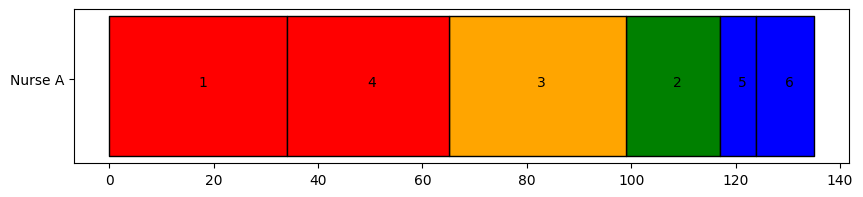

In [53]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_yticks([10])
ax.set_yticklabels(['Nurse A'])

patient_colors = {'1': 'red', '2':'orange', '3':'yellow', '4':'green', '5':'blue'}

for j in range(1, len(patientIndex)):
    ax.broken_barh([(s[j].varValue, treatmentTime[j])], (5, 9), color=patient_colors[str(TriageLevel[j])],  edgecolor='black')
    ax.text(x=(s[j].varValue+ 0.5*treatmentTime[j]), y=9.5, s=j)

###### Q4: Now, we add complexity. There are 3 nurses that treat the patient with the same capability. <br>
a. Re-initialise all variables and add list of nurses

In [54]:
prob_extend = LpProblem("NurseSchedv2", LpMinimize)

b. add and change the decision variable to accomodate nurse index <br>
Decision variable: <br>
(let j = index of patientsn n = index of nurse) <br>
sⱼ = start time of patient j <br>
cⱼ = completion time of patient j <br>
zⱼₖₙ = binary variable (1 if patient k is treated directly after patient j by nurse n) <br>
xⱼₙ = binary variable (1 if nurse n treat patient j)

In [55]:
s = LpVariable.dicts("s", patientIndex, 0, None, LpInteger)
c = LpVariable.dicts("c", patientIndex, 0, None, LpInteger)
z = LpVariable.dicts("z", (patientIndex, patientIndex), 0, None, LpBinary) #add index
#add x

c. Put the objective function from Q3 (no change, as the nurse index does not matter)

d. Modify the constraints

In [56]:
#constraints
#Constraint 1: to make sure that for every patients, the completion time is defined as the total of start time and treatment time
for j in range(1, len(patientIndex)):
    prob_extend += s[j] + treatmentPatient[j] == c[j]

#constraint 2: the start time of each patient is less than his/her arrival time
#constraint 3: for each patient, only 1 nurse assigned (= only one x_jn equals to 1 for each patient)

#Constraint 4: to make sure that if patient k is treated directly after patient j, the completion time patient j should be equal to or smaller than start time of patient k
for n in nurseIndex:
    for j in range(1, len(patientIndex)):
        for k in range(1, len(patientIndex)):
            if j != k:
                prob_extend += c[j] - s[k] <= 1000 * (1 - z[j][k][n])

#Constraint 5: to make sure that each patient has his predecessor (including the first one that has dummy patient with index 0 as predecessor)
for n in nurseIndex:
    for k in range(1, len(patientIndex)):
        prob_extend += lpSum(z[j][k][n] for j in patientIndex if j != k) == x[k][n]

#Constraint 6: to make sure that each patient has his successor (except the last one)
for n in nurseIndex:
    for j in range(len(patientIndex)):
        prob_extend += lpSum(z[j][k][n] for k in range(1, len(patientIndex)) if j != k) <= x[j][n]

NameError: name 'nurseIndex' is not defined

In [ ]:
e. Solve the problem!

f. Visualisation

In [ ]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_yticks([10, 20, 30])
ax.set_yticklabels(['Nurse A', 'Nurse B', 'Nurse C'])

patient_colors = {'1': 'red', '2':'orange', '3':'yellow', '4':'green', '5':'blue'}

i = 20
for n in range(1, 4):
    for j in range(1, len(patientIndex)):
        if x[j][n].varValue == 1:
            ax.broken_barh([(s[j].varValue, treatmentTime[j])], (i+5, 9), color=patient_colors[str(urgenceLevel[j])],  edgecolor='black')
            ax.text(x=(s[j].varValue+ 0.5*treatmentTime[j]), y=i+9.5, s=j)
    i = i - 10

f. What if we add 2 more patients: <br> Patient 7 with triage level 4 arrives at t = 29, need treatment time of 5 minutes <br> Patient 8 with triage level 3 arrives at t = 30, need treatment time of 15 minutes

In [ ]:
prob_extend = LpProblem("NurseSchedv3", LpMinimize)

#insert the lists and dictionaries of all parameters

#insert objective function
#insert all constraints
#solve problem